**Instalar Librerias Necesarias**

In [130]:
import json_lines
import pandas as pd

**Cargar el Dataset de Reviews de la Plataforma Yelp**

In [131]:
# Ya que el archivo es muy grande, Empecemos por leer las primeras 1000 Lineas.

# Leer las primeras 500 líneas del archivo JSON grande
def read_large_json(file_path, num_lines=1000):
    data = []
    with open(file_path, 'rb') as f:
        for i, item in enumerate(json_lines.reader(f)):
            if i >= num_lines:
                break
            data.append(item)
    return data


In [132]:
# Ruta del archivo JSON
file_path = '/content/drive/MyDrive/review.json'

In [133]:
# Leer las primeras 1000 líneas
data = read_large_json(file_path, num_lines=1000)

In [134]:
# Convertir datos a un DataFrame de Pandas
df = pd.DataFrame(data)

In [135]:
# Mostrar las primeras filas del DataFrame
print(df.head())

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0    3.0       0      0     0   
1    5.0       1      0     1   
2    3.0       0      0     0   
3    5.0       1      0     1   
4    4.0       1      0     1   

                                                text                 date  
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year...  2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm...  2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delici

In [136]:
df.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    1000 non-null   object 
 1   user_id      1000 non-null   object 
 2   business_id  1000 non-null   object 
 3   stars        1000 non-null   float64
 4   useful       1000 non-null   int64  
 5   funny        1000 non-null   int64  
 6   cool         1000 non-null   int64  
 7   text         1000 non-null   object 
 8   date         1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


**Clasificacion de Opiniones**

In [138]:
# Usare TextBlod para analizar el sentimiento de cada reseña y clasificarlas como positivas, Negativas o Neutras.

from textblob import TextBlob

# Función para obtener el sentimiento de una reseña
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positiva'
    elif polarity < 0:
        return 'Negativa'
    else:
        return 'Neutra'

# Aplicar la función a la columna de texto de las reseñas
df['sentiment'] = df['text'].apply(get_sentiment)

# Mostrar las primeras filas del DataFrame con el sentimiento
print(df[['text', 'sentiment']].head(50))

                                                 text sentiment
0   If you decide to eat here, just be aware it is...  Positiva
1   I've taken a lot of spin classes over the year...  Positiva
2   Family diner. Had the buffet. Eclectic assortm...  Positiva
3   Wow!  Yummy, different,  delicious.   Our favo...  Positiva
4   Cute interior and owner (?) gave us tour of up...  Positiva
5   I am a long term frequent customer of this est...  Positiva
6   Loved this tour! I grabbed a groupon and the p...  Positiva
7   Amazingly amazing wings and homemade bleu chee...  Positiva
8   This easter instead of going to Lopez Lake we ...  Negativa
9   Had a party of 6 here for hibachi. Our waitres...  Positiva
10  My experience with Shalimar was nothing but wo...  Positiva
11  Locals recommended Milktooth, and it's an amaz...  Positiva
12  Love going here for happy hour or dinner!  Gre...  Positiva
13  Good food--loved the gnocchi with marinara\nth...  Positiva
14  The bun makes the Sonoran Dog. It's 

In [139]:
# Quiero saber el Porcentaje para cada tipo de Reseña. Es decir, Positiva, Negativa y Neutra basandome en el analisis de Sentimientos con TextBlod

# Calcular el número total de reseñas
total_reviews = df.shape[0]

# Contar las reseñas positivas, negativas y neutras
positive_reviews = df[df['sentiment'] == 'Positiva'].shape[0]
negative_reviews = df[df['sentiment'] == 'Negativa'].shape[0]
neutral_reviews = df[df['sentiment'] == 'Neutra'].shape[0]

# Calcular los porcentajes
positive_percentage = (positive_reviews / total_reviews) * 100
negative_percentage = (negative_reviews / total_reviews) * 100
neutral_percentage = (neutral_reviews / total_reviews) * 100

# Mostrar los resultados
print(f'Reseñas Positivas: {positive_percentage:.2f}%')
print(f'Reseñas Negativas: {negative_percentage:.2f}%')
print(f'Reseñas Neutras: {neutral_percentage:.2f}%')

Reseñas Positivas: 88.60%
Reseñas Negativas: 10.90%
Reseñas Neutras: 0.50%


Es interesante el Resultado. Ya que una alta proporción de reseñas positivas puede ser una buena señal para el mercado. El bajo porcentaje de reseñas neutras sugiere que los usuarios tienen opiniones bastante definidas. Vamos a Analizar cada Reseña.

**Análisis de Palabras Clave en Reseñas Positivas**

In [140]:
from sklearn.feature_extraction.text import CountVectorizer

In [141]:
# Filtrar reseñas positivas
positive_reviews = df[df['sentiment'] == 'Positiva']

# Crear una instancia de CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Ajustar y transformar los datos de texto de las reseñas positivas
X_positive = vectorizer.fit_transform(positive_reviews['text'])

# Obtener el vocabulario y las frecuencias de las palabras
vocab_positive = vectorizer.get_feature_names_out()
word_count_positive = X_positive.toarray().sum(axis=0)

# Crear un DataFrame con las palabras y sus frecuencias
word_freq_positive = pd.DataFrame({'word': vocab_positive, 'count': word_count_positive})

# Ordenar el DataFrame por frecuencia en orden descendente
word_freq_positive = word_freq_positive.sort_values(by='count', ascending=False)

# Mostrar las palabras más frecuentes en reseñas positivas
print(word_freq_positive.head(10))

         word  count
2990    great    478
2712     food    477
2943     good    468
4911    place    439
3590     just    297
6720     time    296
3812     like    283
5826  service    279
5296   really    211
6242    staff    187


**Análisis de Palabras Clave en Reseñas Negativas**

In [142]:
# Filtrar reseñas negativas
negative_reviews = df[df['sentiment'] == 'Negativa']

# Ajustar y transformar los datos de texto de las reseñas negativas
X_negative = vectorizer.fit_transform(negative_reviews['text'])

# Obtener el vocabulario y las frecuencias de las palabras
vocab_negative = vectorizer.get_feature_names_out()
word_count_negative = X_negative.toarray().sum(axis=0)

# Crear un DataFrame con las palabras y sus frecuencias
word_freq_negative = pd.DataFrame({'word': vocab_negative, 'count': word_count_negative})

# Ordenar el DataFrame por frecuencia en orden descendente
word_freq_negative = word_freq_negative.sort_values(by='count', ascending=False)

# Mostrar las palabras más frecuentes en reseñas negativas
print(word_freq_negative.head(10))

         word  count
798      food     56
1434    place     54
1133     like     49
1953     time     47
1067     just     46
899      hair     43
1714  service     36
865      good     36
1652     said     35
177       bad     31


**Comparación de Sentimientos**

In [143]:
# Palabras más comunes en reseñas positivas
print("Palabras más comunes en reseñas positivas:")
print(word_freq_positive.head(10))

# Palabras más comunes en reseñas negativas
print("Palabras más comunes en reseñas negativas:")
print(word_freq_negative.head(10))

# Comparar palabras clave
common_words = set(word_freq_positive['word']).intersection(set(word_freq_negative['word']))
print(f'Palabras comunes en ambas: {common_words}')

Palabras más comunes en reseñas positivas:
         word  count
2990    great    478
2712     food    477
2943     good    468
4911    place    439
3590     just    297
6720     time    296
3812     like    283
5826  service    279
5296   really    211
6242    staff    187
Palabras más comunes en reseñas negativas:
         word  count
798      food     56
1434    place     54
1133     like     49
1953     time     47
1067     just     46
899      hair     43
1714  service     36
865      good     36
1652     said     35
177       bad     31
Palabras comunes en ambas: {'job', 'takes', 'june', 'happened', 'layout', 'jacob', 'right', 'overall', 'began', 'brushed', 'covered', 'drive', 'sign', 'american', 'sit', 'collection', 'ask', 'level', 'sandwiches', 'rushed', 'swim', 'contrast', 'sub', 'maple', 'angry', 'refilled', 'manage', 'corn', 'twice', 'yelp', 'hotel', 'unless', 'disclaimer', 'type', 'sad', 'experience', 'nope', 'engine', 'years', 'creve', 'comp', 'refrigerator', 'dessert', 'pr

**Frecuencia de Palabras**

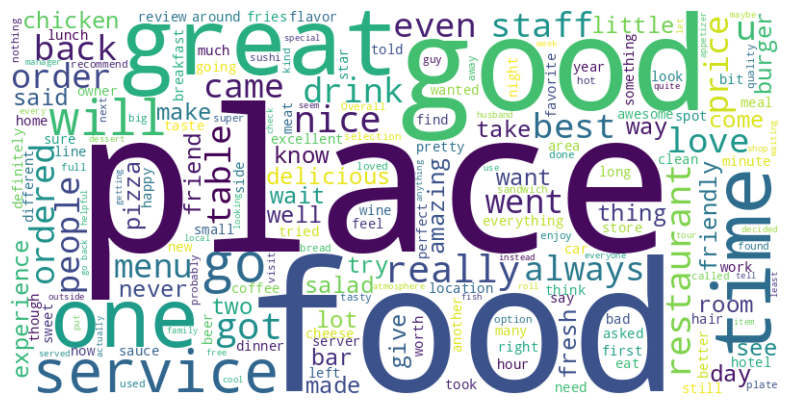

In [144]:
# Visualizacion de Palabras usando WordCloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Unir todas las palabras en una sola cadena de texto
all_words = ' '.join(df['text'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Calcular** **Correlaciones**

In [145]:
# Quiero investigar si hay alguna correlación entre las calificaciones en estrellas y los votos de "useful", "funny" y "cool".

# Seleccionar las columnas relevantes
relevant_columns = ['stars', 'useful', 'funny', 'cool']

# Calcular la matriz de correlación
correlation_matrix = df[relevant_columns].corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

           stars    useful     funny      cool
stars   1.000000 -0.075430 -0.110587  0.054921
useful -0.075430  1.000000  0.580307  0.639757
funny  -0.110587  0.580307  1.000000  0.621140
cool    0.054921  0.639757  0.621140  1.000000


Text(0.5, 1.0, 'Matriz de Correlación entre Estrellas y Votos')

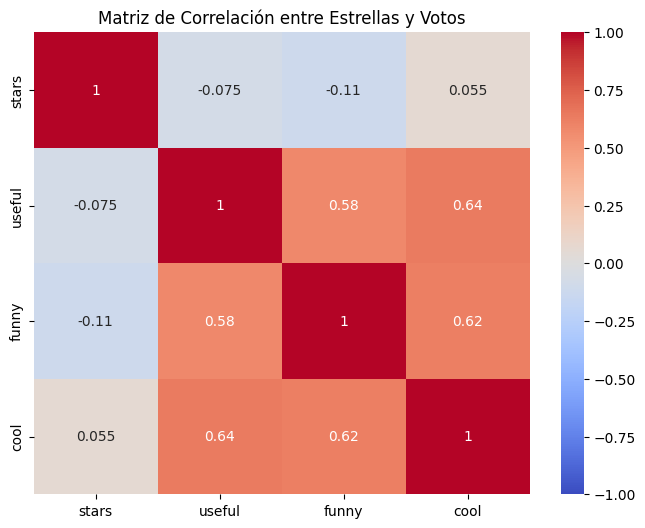

In [146]:
# Veamos el Resultado en una visualizacion usando un mapa de calor

import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Mostrar el gráfico
plt.title('Matriz de Correlación entre Estrellas y Votos')

Parece que las calificaciones en estrellas tienen una correlación muy baja con los votos de "useful", "funny" y "cool". Esto sugiere que la cantidad de estrellas no influye significativamente en cómo los usuarios votan por la utilidad, la gracia o lo genial de una reseña.

Esto indica que los votos "useful", "funny" y "cool" están más relacionados con la calidad del contenido de la reseña misma, más que con la calificación en estrellas que acompaña a la reseña. Es decir, Los votos de "useful", "funny" y "cool" funcionan independientemente de las estrellas, lo que permite que las reseñas sean valoradas por su contenido, sin importar la calificación que se le de al restaurante. Esto otorga mucha flexibilidad para expresar la experiencia del usuario y para que otros usuarios encuentren valor en la reseña de diferentes maneras.

**Análisis de Distribución de Calificaciones**

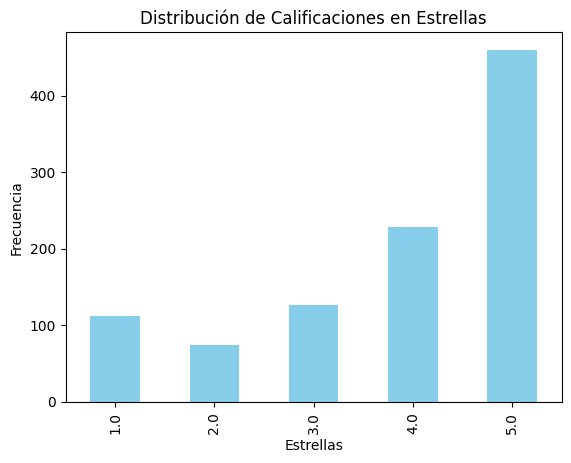

In [147]:
# Observare cómo se distribuyen las calificaciones en estrellas (de 1 a 5) y ver si hay alguna tendencia interesante.

import matplotlib.pyplot as plt

# Distribución de calificaciones en estrellas
df['stars'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribución de Calificaciones en Estrellas')
plt.xlabel('Estrellas')
plt.ylabel('Frecuencia')
plt.show()

Las mayoria de las calificaciones son de 5 estrellas.

**Análisis Temporal**

In [148]:
# Analizare la evolución de las calificaciones y los sentimientos año a año.

# Creare una nueva Columna con los años para saber la calificacion de estrellas promedio por año

# Me Aseguro de que la columna 'date' está en formato datetime
df['date'] = pd.to_datetime(df['date'])

# Agregar una columna para el año
df['year'] = df['date'].dt.year

# Calificaciones promedio por año
yearly_ratings = df.groupby('year')['stars'].mean()

In [149]:
# Ahora obtendre el promedio de la columna sentiment por cada año

# Convertir sentimientos en valores numéricos para el análisis
sentiment_to_num = {'Positiva': 1, 'Neutra': 0, 'Negativa': -1}
df['sentiment_num'] = df['sentiment'].map(sentiment_to_num)

# Sentimientos promedio por año
yearly_sentiments = df.groupby('year')['sentiment_num'].mean()

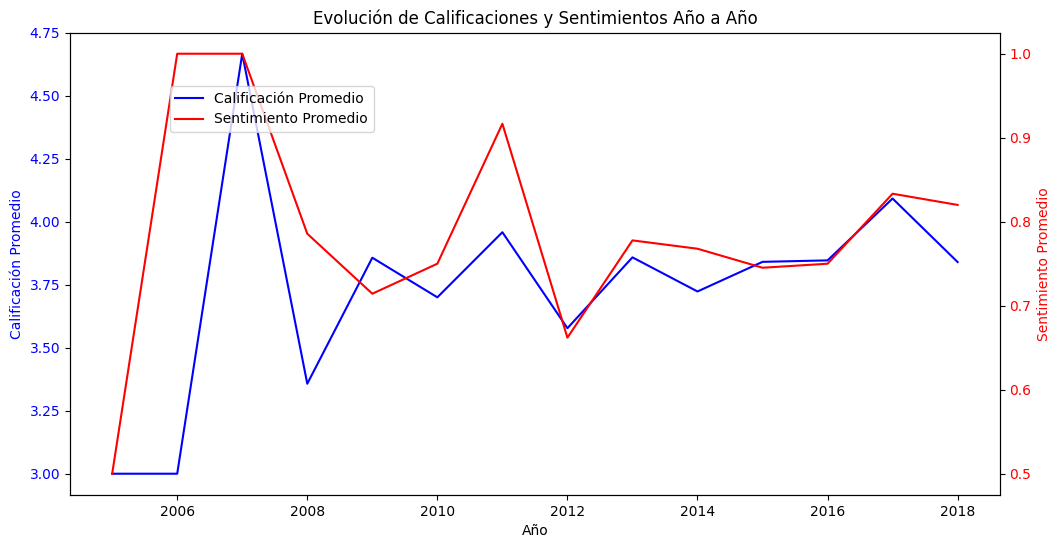

In [150]:
import matplotlib.pyplot as plt

# Crear una figura con dos subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot de calificaciones promedio
ax1.plot(yearly_ratings.index, yearly_ratings, color='blue', label='Calificación Promedio')
ax1.set_xlabel('Año')
ax1.set_ylabel('Calificación Promedio', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje para los sentimientos promedio
ax2 = ax1.twinx()
ax2.plot(yearly_sentiments.index, yearly_sentiments, color='red', label='Sentimiento Promedio')
ax2.set_ylabel('Sentimiento Promedio', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Título del gráfico
plt.title('Evolución de Calificaciones y Sentimientos Año a Año')

# Añadir leyenda
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9), bbox_transform=ax1.transAxes)

# Mostrar el gráfico
plt.show()

**Análisis de Popularidad por Usuario**

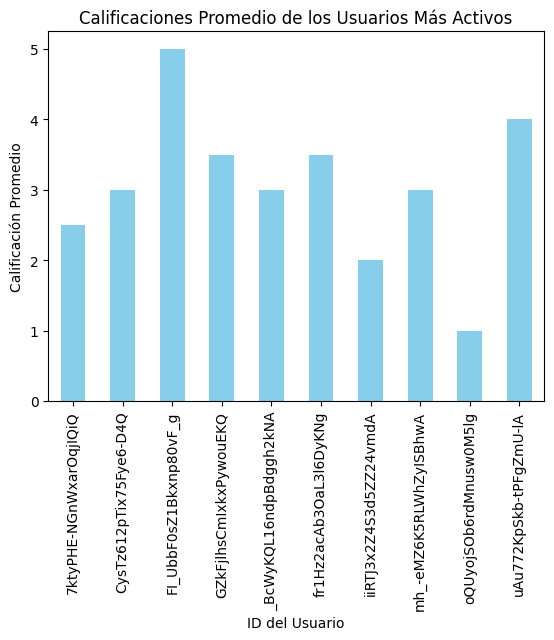

In [151]:
# Ahora analizamos las calificaciones promedio por usuario

# Calificaciones promedio de los usuarios más activos
user_avg_ratings = top_users_df.groupby('user_id')['stars'].mean()

# Visualización de las calificaciones promedio
user_avg_ratings.plot(kind='bar', color='skyblue')
plt.title('Calificaciones Promedio de los Usuarios Más Activos')
plt.xlabel('ID del Usuario')
plt.ylabel('Calificación Promedio')
plt.show()


In [152]:
# Que categoria eligen mas, useful, funny o cool

# Sumar los votos de cada categoría
total_useful = df['useful'].sum()
total_funny = df['funny'].sum()
total_cool = df['cool'].sum()

# Mostrar los resultados
print(f'Total de votos "useful": {total_useful}')
print(f'Total de votos "funny": {total_funny}')
print(f'Total de votos "cool": {total_cool}')


Total de votos "useful": 909
Total de votos "funny": 272
Total de votos "cool": 344


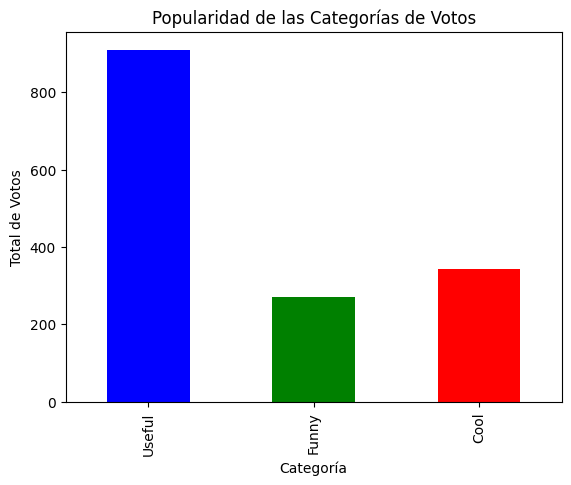

In [153]:
# Visualizamos las Categorias

import matplotlib.pyplot as plt

# Crear un DataFrame con los totales
votes_df = pd.DataFrame({
    'Categoría': ['Useful', 'Funny', 'Cool'],
    'Total de Votos': [total_useful, total_funny, total_cool]
})

# Crear el gráfico de barras
votes_df.plot(kind='bar', x='Categoría', y='Total de Votos', legend=False, color=['blue', 'green', 'red'])
plt.title('Popularidad de las Categorías de Votos')
plt.xlabel('Categoría')
plt.ylabel('Total de Votos')
plt.show()

1.-Insights de Votos:

Utilidad de las Reseñas: Dado que los votos de "useful" están correlacionados con otros votos y pueden no depender de las calificaciones en estrellas, esto indica que los usuarios valoran mucho las reseñas que consideran útiles, independientemente de si son positivas o negativas. Incorporar este análisis en el sistema de recomendaciones y alertas tempranas permitirá identificar reseñas valiosas para la toma de decisiones.

Alertas Tempranas: Las reseñas con calificaciones medias pero con alto número de votos "useful" o "funny" pueden indicar áreas que necesitan atención rápida y no solo aquellas con calificaciones bajas.

2.-Evolución Temporal:

Tendencias de Opiniones: Analizar cómo cambian las calificaciones y sentimientos año a año puede ayudar a anticipar tendencias en el mercado. Esto puede ser utilizado para predecir periodos de alta y baja satisfacción del cliente, permitiendo a los gerentes prepararse mejor.

3.-Confiabilidad de Reseñas:

Los usuarios más activos tienden a recibir más votos. Estos usuarios pueden ser identificados como influyentes y sus opiniones pueden tener un peso mayor en los modelos predictivos y de recomendaciones.